# Wine Segmentation Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
%matplotlib inline

In [2]:
wine_info = pd.read_csv('wine-clustering.csv')
wine_info.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Checking Null values

In [3]:
wine_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
wine_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(wine_info)

# Clustering Models

## DBSCAN

In [72]:
db = DBSCAN(eps=0.5,min_samples=3) # default parameter values
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 22
Silhouette Coefficient: 0.230
Davies Bouldin Coefficient: 3.097


## K-Means Clustering

#### Silhouette scores:

Silhouette Coefficient: 0.299
Davies Bouldin Coefficient: 1.355


<Figure size 1080x432 with 0 Axes>

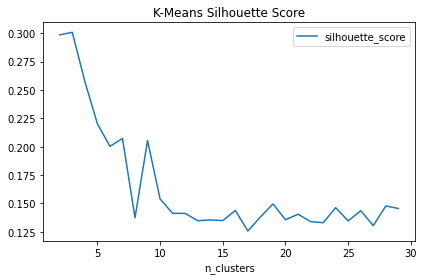

<Figure size 1080x432 with 0 Axes>

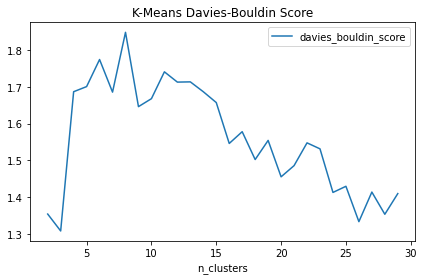

In [7]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=KMeans(n_clusters=c, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()

## Spectral Clustering

Silhouette Coefficient: 0.299
Davies Bouldin Coefficient: 1.355


<Figure size 1080x432 with 0 Axes>

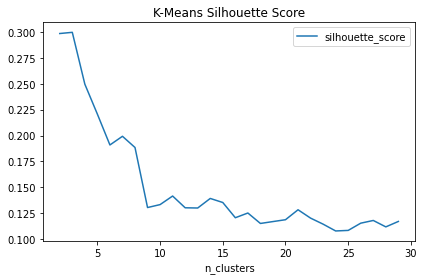

<Figure size 1080x432 with 0 Axes>

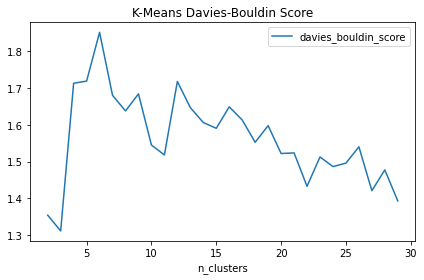

In [8]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=SpectralClustering(n_clusters=c)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()